In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 600x100 with 0 Axes>

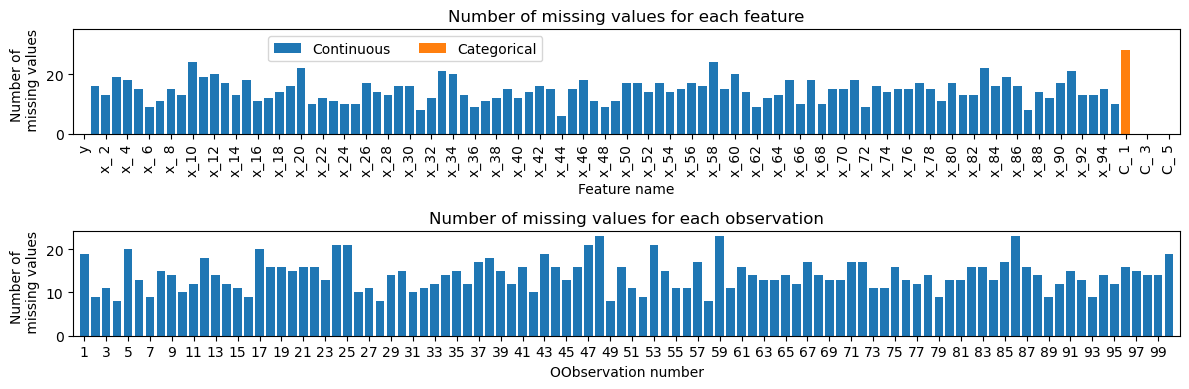

In [180]:
data = pd.read_csv('case1Data.txt', sep=',', skipinitialspace=True)
plt.figure(figsize=(6, 1))  
nan_counts_columns = data.isnull().sum()

continuous_data = nan_counts_columns[:96]
categorical_data = nan_counts_columns[96:]
filtered_column_names = nan_counts_columns.index[::2]
nan_counts_rows = data.isnull().sum(axis=1)  # Tæller antallet af NaN-værdier pr. observation


# Opret subplot
fig, axs = plt.subplots(2, 1, figsize=(12, 4))

# Plot antallet af NaN-værdier pr. kolonne
axs[0].bar(continuous_data.index, continuous_data, color='tab:blue', label='Continuous')
axs[0].bar(categorical_data.index, categorical_data, color='tab:orange', label='Categorical')
axs[0].set_title('Number of missing values for each feature')
axs[0].set_xlabel('Feature name')
axs[0].set_ylabel('Number of \n missing values')
axs[0].set_xticks(filtered_column_names)
axs[0].set_xticklabels(filtered_column_names, rotation=90)
axs[0].set_xlim([-1, 101])
axs[0].set_ylim([0, 35])
axs[0].legend(ncol=2, loc='upper center', bbox_to_anchor=(0.3, 1))  # Placer legenden i midten af plottet


# Plot antallet af NaN-værdier som funktion af observationens nummer
axs[1].bar(range(1, len(nan_counts_rows)+1), nan_counts_rows)
axs[1].set_title('Number of missing values for each observation')
axs[1].set_xlabel('OObservation number')
axs[1].set_ylabel('Number of \n missing values')
axs[1].set_xlim([0, 101])
axs[1].set_xticks(range(1, len(nan_counts_rows)+1, 2))

plt.tight_layout()  
plt.savefig('Plots/Number_of_nan.eps', format='eps', bbox_inches='tight')
plt.show()




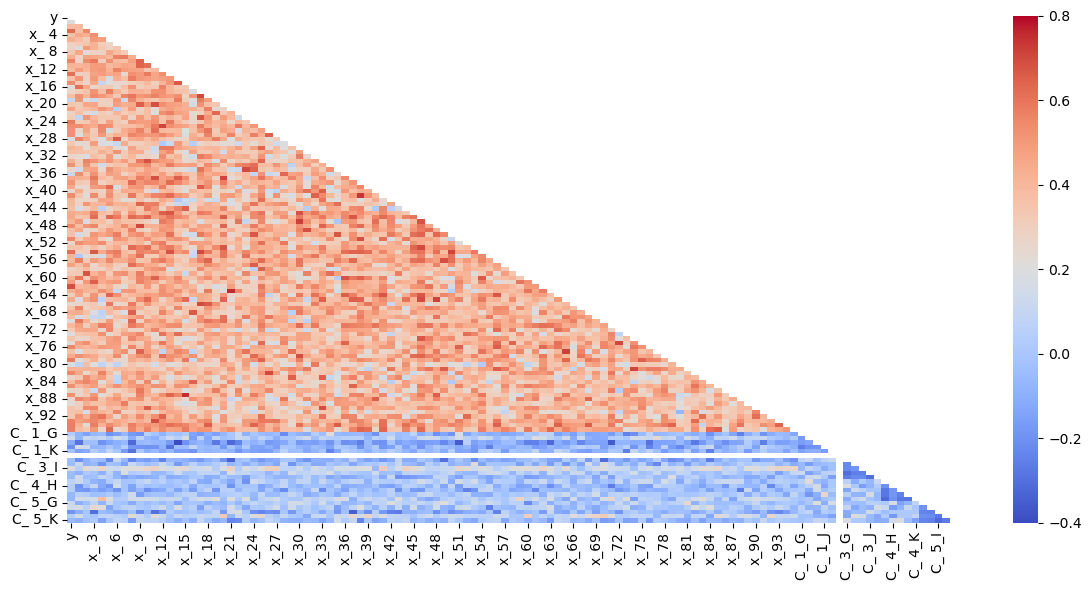

In [181]:
data_encoded_tot = pd.get_dummies(data)
correlation_matrix = data_encoded_tot.corr()
mask = np.triu(np.ones_like(correlation_matrix)) 
plt.figure(figsize=(12, 6))  
sns.heatmap(correlation_matrix, cmap='coolwarm', mask=mask, vmin=-0.4, vmax = 0.8)
plt.savefig('Plots/corre_map.pdf', format='pdf', bbox_inches='tight')
plt.tight_layout()
plt.show()




The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


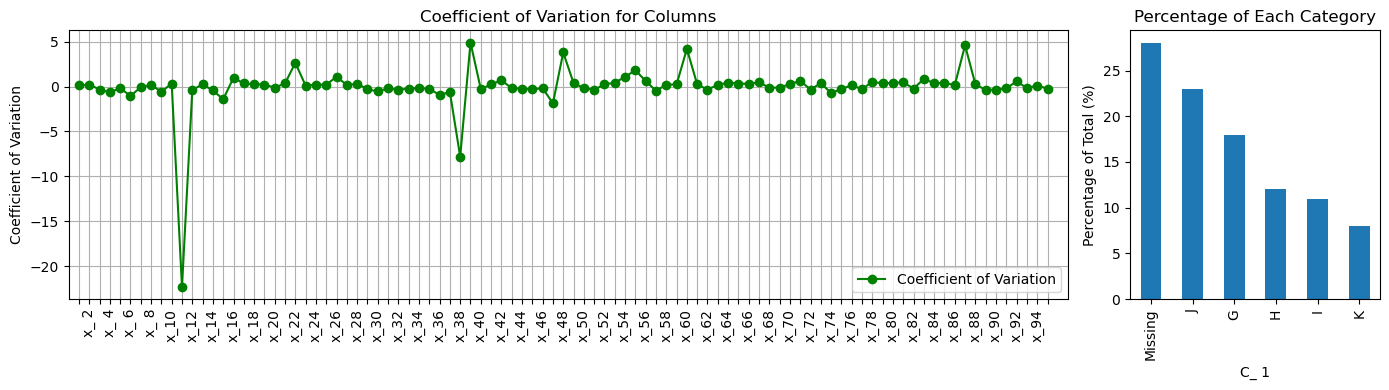

In [204]:
import numpy as np
import matplotlib.pyplot as plt

# Erstat NaN-værdier med 'Missing'
data_column_filled = data_column.fillna('Missing')

# Tæl antallet af observationer i hver kategori inklusive NaN
category_counts_filled = data_column_filled.value_counts()

# Beregn procentdelen af hver kategori inklusive NaN
total_count_filled = len(data_column_filled)
category_percentages_filled = (category_counts_filled / total_count_filled) * 100

# Opret figurer og akser
fig, axs = plt.subplots(1, 2, figsize=(14, 4), gridspec_kw={'width_ratios': [4, 1]})

# Plot for Coefficient of Variation
axs[0].plot(coefficient_of_variation, 'o-', label='Coefficient of Variation', color='green')
axs[0].set_ylabel('Coefficient of Variation')
axs[0].set_title('Coefficient of Variation for Columns')
axs[0].legend(loc='lower right')
axs[0].grid(True)
axs[0].set_xlim([-1, 96])

plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=90)

# Kun vis hver anden tick på x-aksen
for label in axs[0].xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

# Plot for Percentage of Each Category
category_percentages_filled.plot(kind='bar', ax=axs[1])
axs[1].set_ylabel('Percentage of Total (%)')
axs[1].set_title('Percentage of Each Category')

plt.savefig('Plots/coe_var.eps', format='eps', bbox_inches='tight')
plt.tight_layout()
plt.show()


C:\Users\madsp\AppData\Local\Temp\ipykernel_15908\3571639617.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_column, shade=True)
c:\Users\madsp\anaconda3\envs\DA_Env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


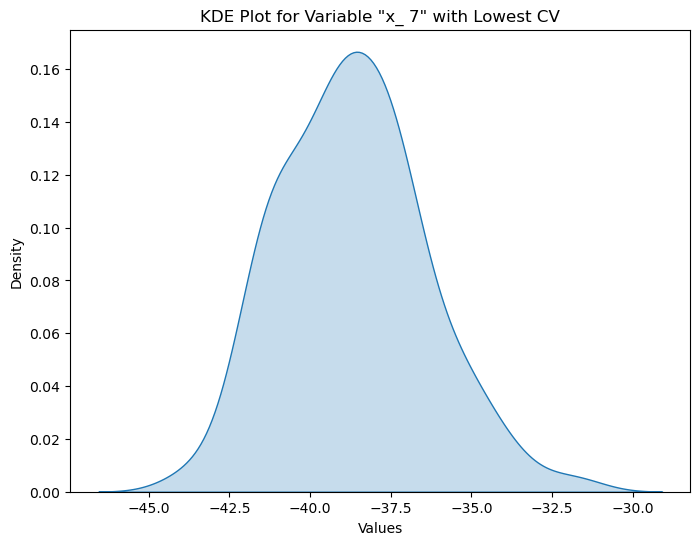

-0.05779465957090226


In [201]:
import seaborn as sns

# Beregn CV for hver variabel
std_dev = data_subset.std()
mean_val = data_subset.mean()
coefficient_of_variation = std_dev / mean_val

# Find den variabel med den mindste CV-værdi
min_cv_variable = abs(coefficient_of_variation).idxmin()

# Udtræk data fra den variable med den mindste CV
data_column = data_subset[min_cv_variable].dropna()

# Lav KDE plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data_column, shade=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title(f'KDE Plot for Variable "{min_cv_variable}" with Lowest CV')
plt.show()
print(coefficient_of_variation[min_cv_variable])